### Objective

Given dataset of edible/ posionous mushrooms, create a model for predicting if a given mushroom is edible or not




In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
# Getting the data
mushrooms = pd.read_csv("data/mushrooms.csv")
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


### Data Understanding

In [3]:
mushrooms.shape

(8124, 23)

In [4]:
mushrooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

- 8124  observations
- 23 columns
- Target: class

In [5]:
# Checking class Levels counts
mushrooms["class"].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [6]:
# converting class levels into 0 and 1 s : Poisonous=1 edible=0
mushrooms["class"] = mushrooms["class"].map({"p":1,"e":0})
mushrooms["class"].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [7]:
cat_vars = list(mushrooms.columns[1:])

In [8]:
# Encoding all categorical variables to convert to numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

mushrooms[cat_vars] = mushrooms[cat_vars].apply(le.fit_transform)
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [9]:
# Checking value_counts for each variables
for i in mushrooms.columns:
    print(" Value counts for variable: ",i)
    print(mushrooms[i].value_counts())

 Value counts for variable:  class
0    4208
1    3916
Name: class, dtype: int64
 Value counts for variable:  cap-shape
5    3656
2    3152
3     828
0     452
4      32
1       4
Name: cap-shape, dtype: int64
 Value counts for variable:  cap-surface
3    3244
2    2556
0    2320
1       4
Name: cap-surface, dtype: int64
 Value counts for variable:  cap-color
4    2284
3    1840
2    1500
9    1072
8    1040
0     168
5     144
1      44
7      16
6      16
Name: cap-color, dtype: int64
 Value counts for variable:  bruises
0    4748
1    3376
Name: bruises, dtype: int64
 Value counts for variable:  odor
5    3528
2    2160
8     576
7     576
0     400
3     400
6     256
1     192
4      36
Name: odor, dtype: int64
 Value counts for variable:  gill-attachment
1    7914
0     210
Name: gill-attachment, dtype: int64
 Value counts for variable:  gill-spacing
0    6812
1    1312
Name: gill-spacing, dtype: int64
 Value counts for variable:  gill-size
0    5612
1    2512
Name: gill-size, dt

In [10]:
# dropping column veil-type as all values are same
mushrooms = mushrooms.drop("veil-type",axis=1)
cat_vars.remove("veil-type")
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


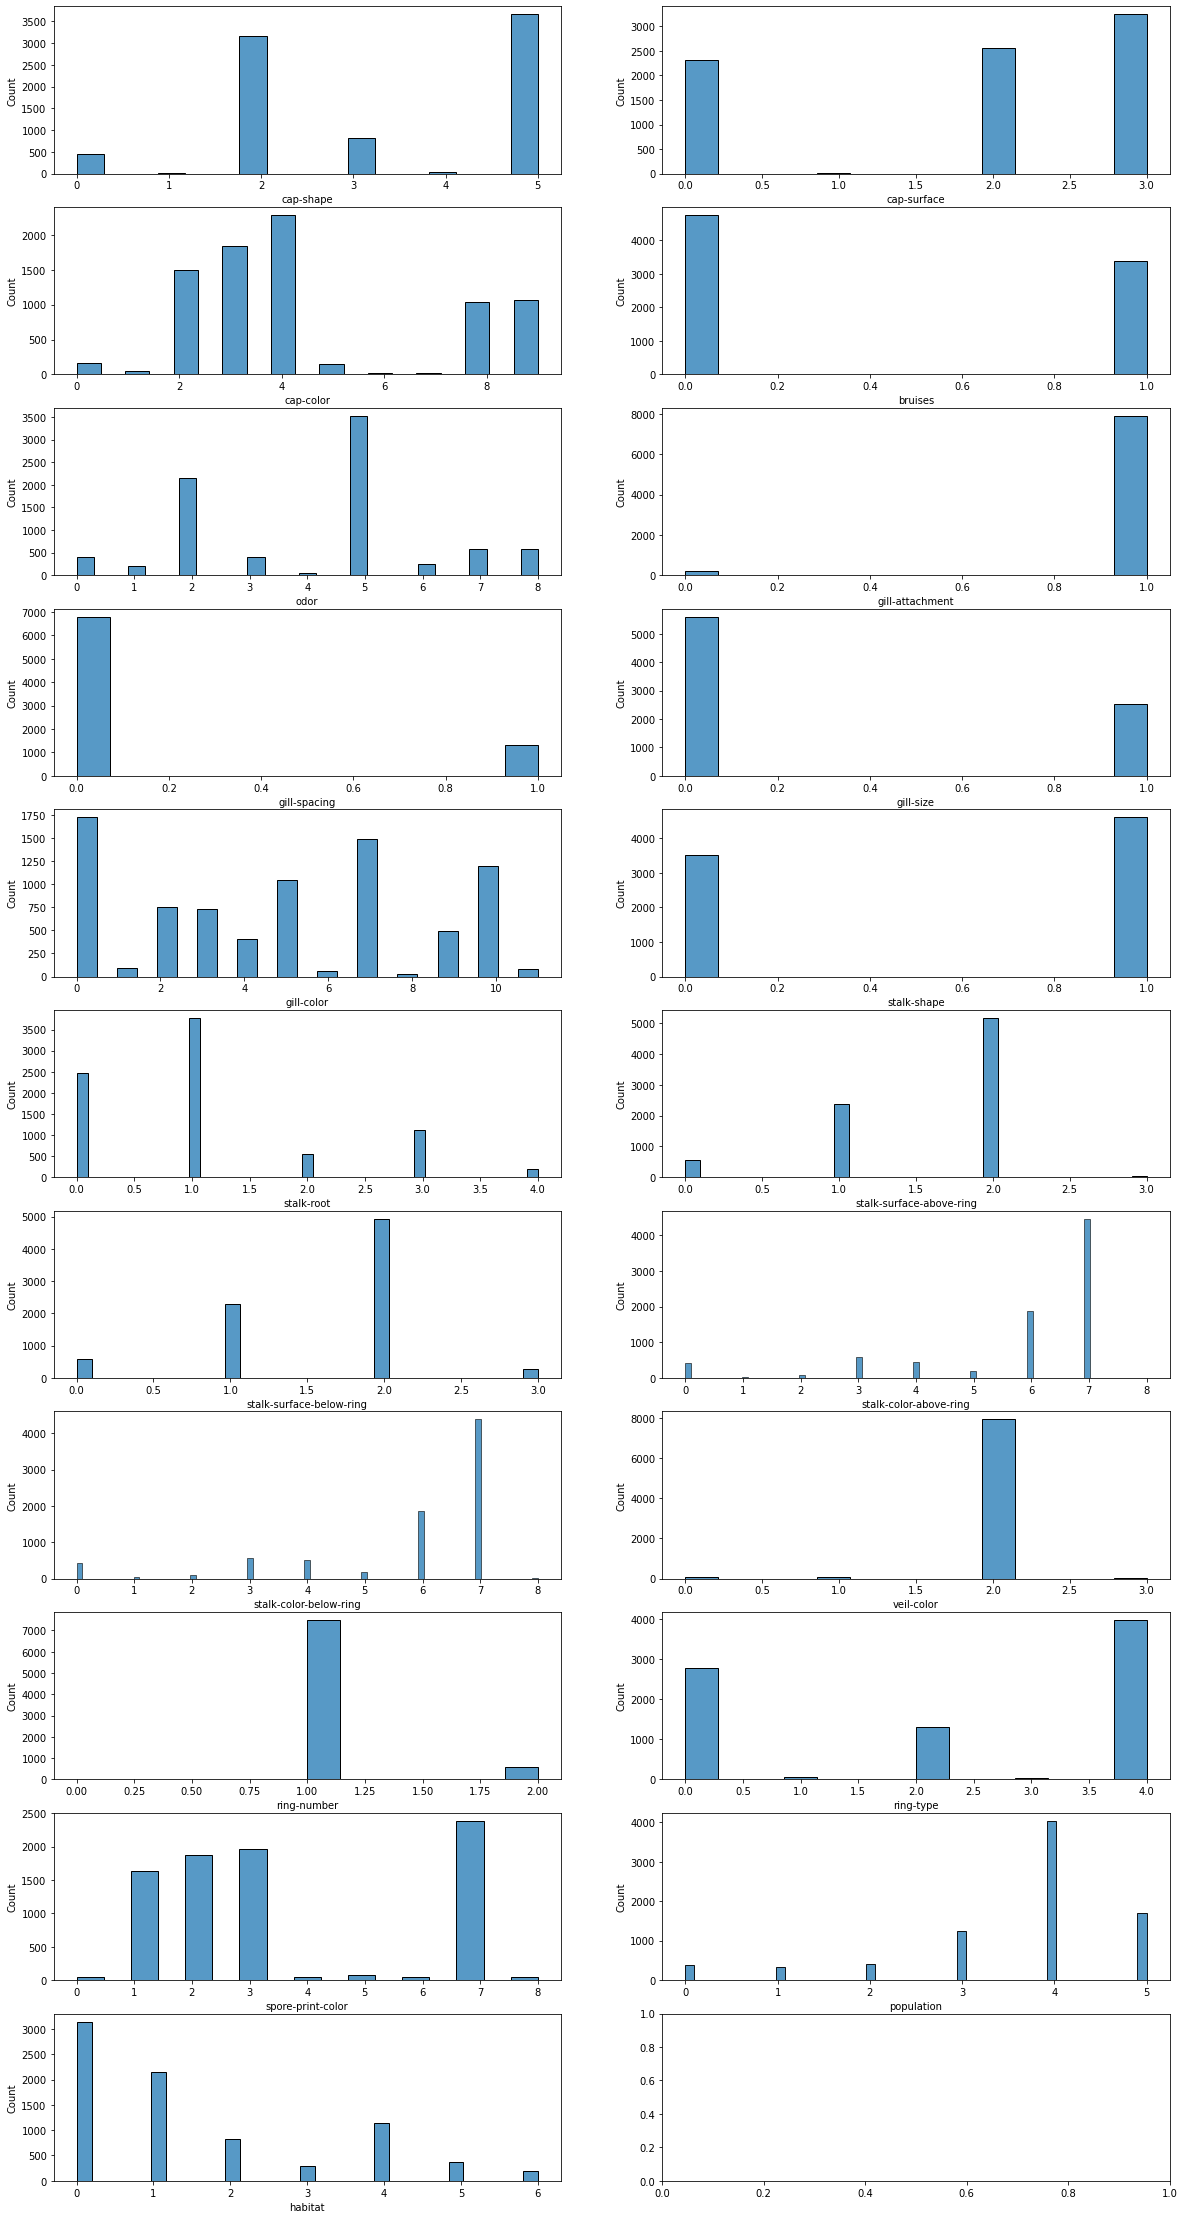

In [11]:
# Checking distributions for each variables ( Except target)
nrows=11
ncols=2

fig, axes = plt.subplots(nrows=nrows,ncols=ncols,figsize=(20,40))


for i, cols in enumerate(cat_vars):
    sns.histplot(mushrooms[cols],ax=axes[i//ncols,i%ncols])

In [12]:
# splitting data into training and test sets
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(mushrooms,train_size=0.7,random_state=100)

In [13]:
# Training set
y_train = df_train["class"]
X_train = df_train.drop("class",axis=1)

#Test set
y_test = df_test["class"]
X_test = df_test.drop("class",axis=1)

##### Decision Tree classifier with default parameter set

In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=5)

defaultdt = dt.fit(X_train,y_train)

In [15]:
y_train_pred = defaultdt.predict(X_train)

In [16]:
# Evaluation against training set itself
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report")
print(classification_report(y_train,y_train_pred))
print("Confusion Matrix")
print(confusion_matrix(y_train,y_train_pred))
print("Accuracy is : ",accuracy_score(y_train,y_train_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2950
           1       0.99      0.96      0.98      2736

    accuracy                           0.98      5686
   macro avg       0.98      0.98      0.98      5686
weighted avg       0.98      0.98      0.98      5686

Confusion Matrix
[[2936   14]
 [  96 2640]]
Accuracy is :  0.9806542384804784


In [17]:
# Evaluation of the model against test set
y_test_pred = defaultdt.predict(X_test)
print("Classification Report")
print(classification_report(y_test,y_test_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_test_pred))
print("Accuracy is : ",accuracy_score(y_test,y_test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1258
           1       0.99      0.97      0.98      1180

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

Confusion Matrix
[[1248   10]
 [  40 1140]]
Accuracy is :  0.9794913863822805


- This looks good, Let us try to tune DecisionTree parameters 

In [18]:
# Will use Gridsearchcv to tune hyperparameters
from sklearn.model_selection import KFold,GridSearchCV

In [19]:
# List of parameters to tune
param_to_tune =  {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds=5

# Initialize Decision Tree Classifier
dtree = DecisionTreeClassifier()

gridsearch = GridSearchCV(estimator=dtree, param_grid=param_to_tune, cv=n_folds, verbose=1, scoring="accuracy",return_train_score=True)

gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [20]:
print("best accuracy: ",gridsearch.best_score_)
print("best parameters: ",gridsearch.best_estimator_)

best accuracy:  0.9873383383336967
best parameters:  DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       min_samples_split=50)


In [21]:
# The best model for Decision Tree 
dtree_grid = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,min_samples_split=50)

dtree_final =dtree_grid.fit(X_train,y_train)


In [22]:
# Evaluation against test set
y_test_pred = dtree_final.predict(X_test)

print("Classification Report")
print(classification_report(y_test,y_test_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_test_pred))
print("Accuracy is : ",accuracy_score(y_test,y_test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1258
           1       1.00      0.99      0.99      1180

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438

Confusion Matrix
[[1258    0]
 [  14 1166]]
Accuracy is :  0.9942575881870386


# Trying Random Forest Classifier 

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
parameters_to_tune = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,1000, 100], 
    'max_features': [5, 10]
}

n_folds=5

# Random forest object

rfc = RandomForestClassifier()

gridrfc = GridSearchCV(estimator= rfc, cv=n_folds, param_grid=parameters_to_tune,scoring="accuracy",return_train_score=True)


gridrfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(200, 500, 200),
                         'n_estimators': [100, 1000, 100]},
             return_train_score=True, scoring='accuracy')

In [25]:
print("best accuracy: ",gridrfc.best_score_)
print("best parameters: ",gridrfc.best_estimator_)

best accuracy:  0.9773124168216238
best parameters:  RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=100,
                       min_samples_split=200)


In [26]:
rfc = RandomForestClassifier(max_depth=4, max_features=5, min_samples_leaf=100,min_samples_split=200)

rfc_model =  rfc.fit(X_train,y_train)

In [27]:
y_test_pred = rfc_model.predict(X_test)


print("Classification Report")
print(classification_report(y_test,y_test_pred))
print("Confusion Matrix")
print(confusion_matrix(y_test,y_test_pred))
print("Accuracy is : ",accuracy_score(y_test,y_test_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1258
           1       0.99      0.97      0.98      1180

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438

Confusion Matrix
[[1246   12]
 [  39 1141]]
Accuracy is :  0.9790812141099262


# Trying Naive Bayes Classifier as all variables are categorical

In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
mnb = MultinomialNB()

mnb.fit(X_train,y_train)

MultinomialNB()

In [30]:
y_pred = mnb.predict(X_train)
y_pred_proba = mnb.predict_proba(X_train)

In [31]:
y_pred_proba[:,0]

array([9.98785082e-01, 9.08534760e-01, 9.91927728e-01, ...,
       7.07286682e-01, 3.58229103e-04, 2.05773277e-03])

In [32]:
# Training results
train_result = pd.DataFrame({"y_true":y_train.values,"y_pred_proba":y_pred_proba[:,1],"predicted":y_pred})
train_result.head()

,y_true,y_pred_proba,predicted
0,0,0.001215,0
1,0,0.091465,0
2,0,0.008072,0
3,0,0.000143,0
4,0,0.032758,0


In [33]:
from sklearn.metrics import roc_curve

In [34]:
fpr,tpr,threshold = roc_curve(y_train,y_pred_proba[:,1])

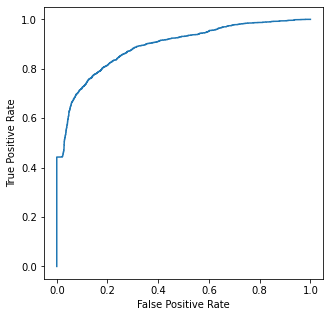

In [35]:
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

- This is not that good

- The decision tree or the random forest one is better 

- The Decision Tree classifer had maximum test accuracy 0.994...

In [51]:
# Let us vizualize the decision tree
from IPython.display import Image  
from io import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz


In [58]:
features = list(X_test.columns)


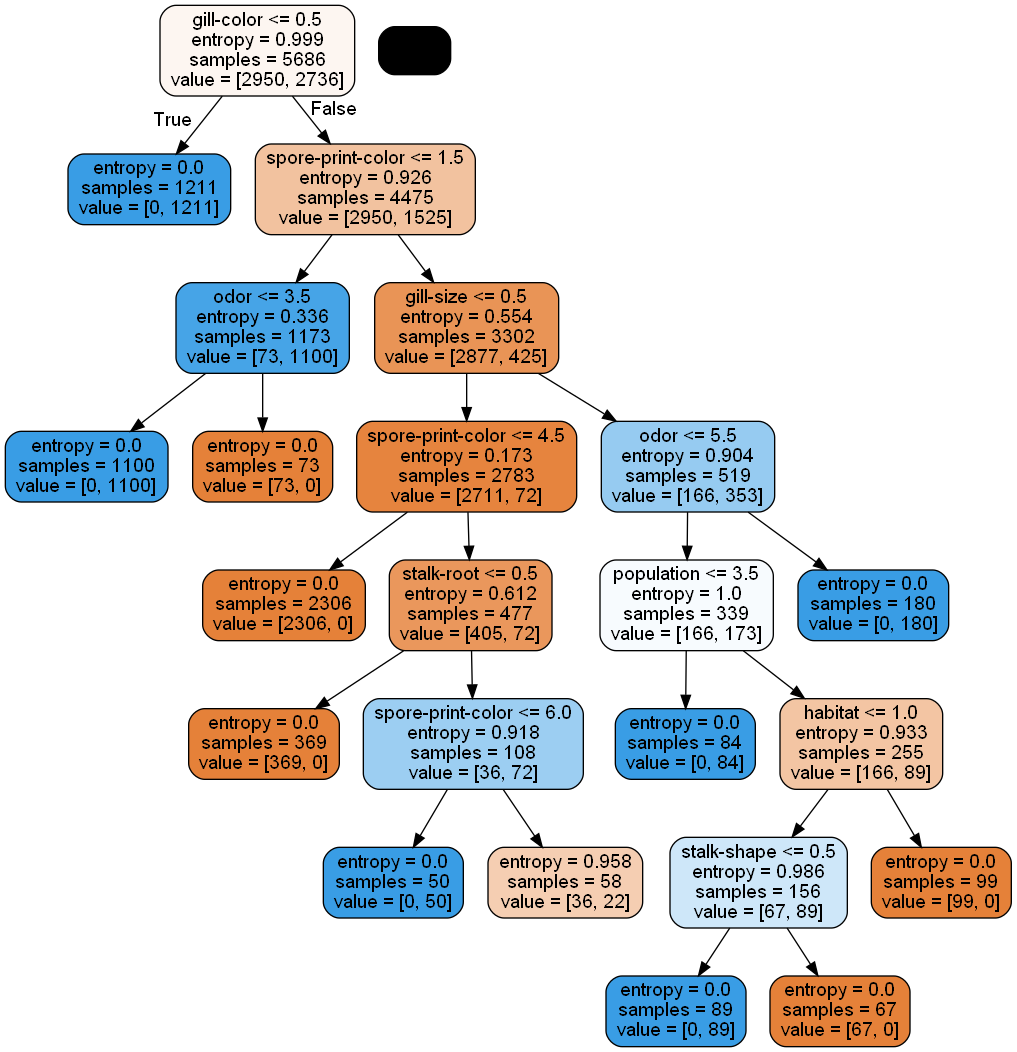

In [59]:
# plotting tree
dot_data = StringIO()  
export_graphviz(dtree_final, out_file=dot_data,feature_names=features, filled=True,rounded=True) # outfile is dot_data

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())   # Creating graph
Image(graph.create_png()) # show image
